# Exploratory studies on using Machine Learning as alternative to Pulse Shape Discriminator

In some Low background physics experiments, we classify the collected data into group based on the characteristics of the data recorded. Pulse Shape Discriminator as it known as is one of such method. Where data are grouped into "Signal" and "Background" based on certain characteristics of the waveform. With varying degree, It is an effective and successful method of classifying data. 

## Why Machine Learning?

In the area of Computer Science and Artificial Intelligence, Deep learning has gain lots of traction in the last decade or so. This is clearly demonstrated with AlphaGO defeated some of the world best GO players where deep learning is employed. Facial recognition in our mobile devices and Smart assistance are also a clear example of the improvement made because of deep learning. With this surge in the popularity of deep learning, it is no surprise the such technologies/algorithm is also being used by physcist. The classification of Higgs data and classification of astronomy data from experiments are few examples of Machine Learning technique used by the physics community. So I have looked into ways how can we deploy such technique for typical data process in a physics experiment environment.

## Classifying waveform based on the overall shape

Lets plot a very generic portion of waveform where most of the classification characteristics occurs.

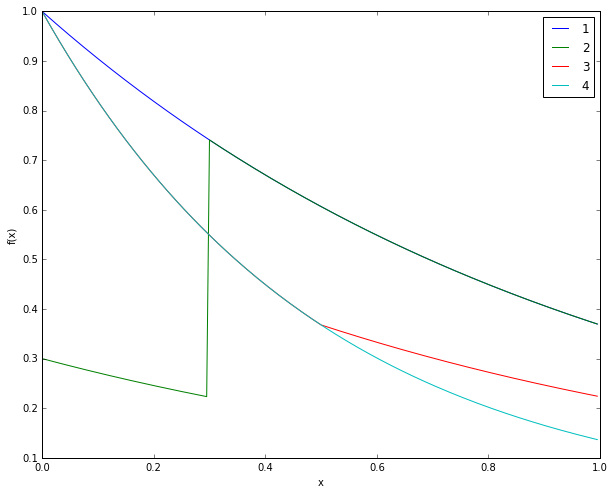

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0)

x = np.arange(0,1,0.005)
y1 = np.exp(-x)

y2 = np.zeros(len(x))
for i in range(len(x)):
    if i < int(0.3*len(x)):
        y2[i] = 0.3*np.exp(-x[i]) 
    if i >= int(0.3*len(x)):
        y2[i] = np.exp(-x[i]) 

y3 = np.zeros(len(x))
for i in range(len(x)):
    if i < int(0.5*len(x)):
        y3[i] = np.exp(-2*x[i]) 
    if i >= int(0.5*len(x)):
        y3[i] = np.exp(-(x[i]+0.5)) 
y4 = np.exp(-2*x)

plt.figure()
plt.plot(x,y1,label="1")
plt.plot(x,y2,label="2")
plt.plot(x,y3,label="3")
plt.plot(x,y4,label="4")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend()
plt.show()

## Preparing the data

Adding some noise to generic function for the function above(random generator/Monte Carlo Method) and produce about a set of 10000 "waveform" for each function. A  plot below shows one of the entry of such "waveform".

(10000, 200) (200,)


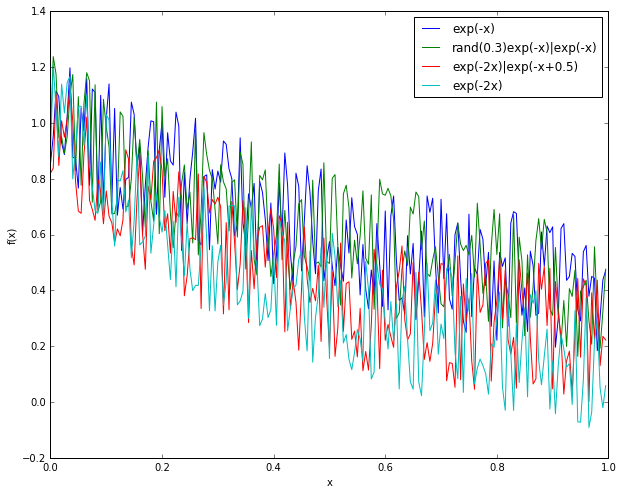

In [3]:
n = 10000
no_of_x = 200
noise = 0.5

def x_generator(n):
	input_x = np.zeros((n,no_of_x))
	for i in range(n):
		input_x[i] = np.arange(0,1,0.005)
	return input_x

x_axis = x_generator(n)

def beta(x):
	yall = np.zeros((n,no_of_x))
	for i in range(n):
		yall[i] = np.exp(-x[i]) + (np.random.rand(no_of_x)*noise - noise/2.)

	return yall

# print(beta(x_axis))


def gamma(x):
	yall = np.zeros((n,no_of_x))
	for i in range(n):
		pileup = np.random.rand(1)*0.3
		for j in range(no_of_x):
			if j < int(pileup*no_of_x):
				yall[i][j] = 0.3*np.exp(x[i][j]) + (np.random.rand(1)*noise - noise/2.)
			if j >= int(pileup*no_of_x):
				yall[i][j] = np.exp(-x[i][j]) + (np.random.rand(1)*noise - noise/2.)

	return yall

def alt1(x):
	yall = np.zeros((n,no_of_x))
	for i in range(n):
		for j in range(no_of_x):
			if j < int(0.5*no_of_x):
				yall[i][j] = np.exp(-2*x[i][j]) + (np.random.rand(1)*noise - noise/2.)
			if j >= int(0.5*no_of_x):
				yall[i][j] = np.exp(-(x[i][j]+0.5)) + (np.random.rand(1)*noise - noise/2.)
	return yall

def alt3(x):
	yall = np.zeros((n,no_of_x))
	for i in range(n):
		ratio = np.random.rand(3)
		ratio = ratio/sum(ratio)
		shift = np.random.rand(2)/no_of_x
		yall[i] = np.exp(-2*x[i]) + (np.random.rand(no_of_x)*noise - noise/2.)
	return yall

x1 = beta(x_axis)
x2 = gamma(x_axis)
x3 = alt1(x_axis)
x4 = alt3(x_axis)

print(x_axis.shape,x1[1].shape)
fig1 = plt.figure()
plt.plot(x_axis[1], x1[1], label="exp(-x)")
plt.plot(x_axis[1], x2[1], label="rand(0.3)exp(-x)|exp(-x)")
plt.plot(x_axis[1], x3[1], label="exp(-2x)|exp(-x+0.5)")
plt.plot(x_axis[1], x4[1], label="exp(-2x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

# Convulution Neural Network(CNN)

It is a type of machine learning algorithm that excels at recognising patterns in data that is useful in classification problems. It is well demonstrated in Visual recognition problems, see ImageNet Challenge 2012 where CNN were demonstrated to provide huge improvement for image classification problems, and ever since being consistently used in the ImageNet Challenge.

## Using CNN as an alternative method to Pulse Shape Discrimination

Pulse Shape Discrimination exploit the pulse shape where a single parameter computed represents a certain characteristic of the waveform. 

Currently, I am only able to suggest this as alternative to PSD where I classify events directly at the raw data level. There is not obvious advantage doing so therefore what I am going to show is an Exploratory studies on using machine learning methods on experimental physics data processes.

### A demonstration of using CNN to classifying different slope/gradient

Here I am going to show how I am able to classifying the generated data into the 4 groups of functions with noise added with an accuracy of more than 99%. The code below is where I prepare the data for training the CNN and also the training process.

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 1, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 1, 64)        6208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 1, 64)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 1, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

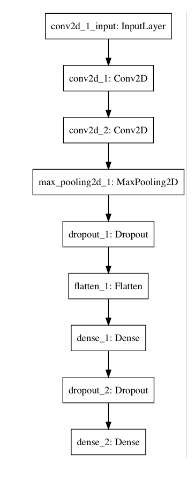

Train on 32000 samples, validate on 7996 samples
Epoch 1/30
32000/32000 [==============================] - 21s - loss: 0.2838 - acc: 0.8883 - val_loss: 0.0964 - val_acc: 0.9677
Epoch 2/30
32000/32000 [==============================] - 20s - loss: 0.0990 - acc: 0.9707 - val_loss: 0.0665 - val_acc: 0.9799
Epoch 3/30
32000/32000 [==============================] - 19s - loss: 0.0808 - acc: 0.9767 - val_loss: 0.0609 - val_acc: 0.9809
Epoch 4/30
32000/32000 [==============================] - 20s - loss: 0.0708 - acc: 0.9801 - val_loss: 0.0567 - val_acc: 0.9811
Epoch 5/30
32000/32000 [==============================] - 20s - loss: 0.0641 - acc: 0.9820 - val_loss: 0.0509 - val_acc: 0.9845
Epoch 6/30
32000/32000 [==============================] - 20s - loss: 0.0579 - acc: 0.9846 - val_loss: 0.0459 - val_acc: 0.9862
Epoch 7/30
32000/32000 [==============================] - 19s - loss: 0.0536 - acc: 0.9857 - val_loss: 0.0400 - val_acc: 0.9884
Epoch 8/30
32000/32000 [==============================]

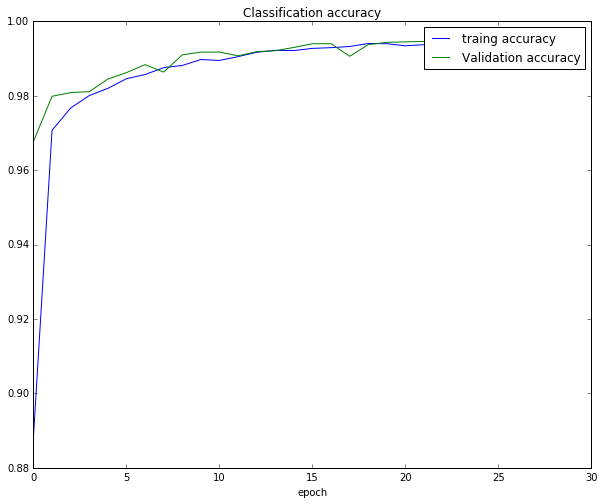

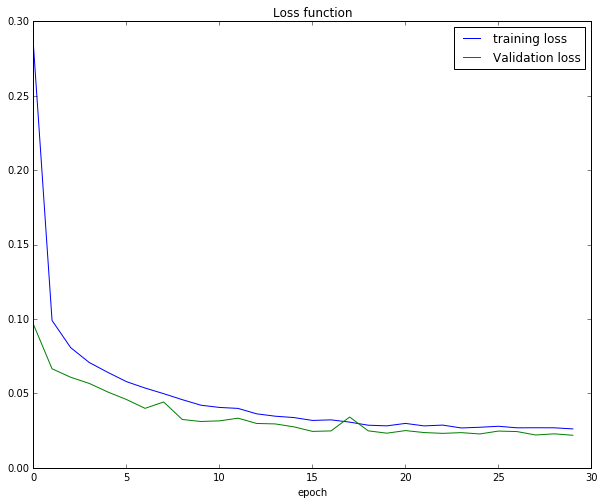

Classification accuracy = 0.995372688147


In [3]:
def separation(x,ratio):
	train = np.zeros((int(len(x)*ratio),no_of_x))
	test = np.zeros((int(len(x)*(1.-ratio)),no_of_x))
	for i in range(n):
		if i < (n*ratio):
			train[i] = x[i]
		if i >= (n*ratio):
			k = i - int(n*ratio) - 1
			test[k] = x[i]
	return train, test

train_beta, test_beta = separation(x1,0.8)
train_gamma, test_gamma  = separation(x2,0.8)
train_3, test_3  = separation(x3,0.8)
train_4, test_4  = separation(x4,0.8)

def labelling(x,num):
	label = np.zeros(len(x))
	for i in range(len(x)):
		label[i] = num
	return label

label_train_beta = labelling(train_beta,0)
label_train_gamma = labelling(train_gamma,1)
label_train_3 = labelling(train_3,2)
label_train_4 = labelling(train_4,3)

label_test_beta = labelling(test_beta,0)
label_test_gamma = labelling(test_gamma,1)
label_test_3 = labelling(test_3,2)
label_test_4 = labelling(test_4,3)

data_train = np.concatenate((train_beta,train_gamma,train_3,train_4), axis=0)
data_test = np.concatenate((test_beta,test_gamma,test_3,test_4), axis=0)
label_train = np.concatenate((label_train_beta,label_train_gamma,label_train_3,label_train_4),axis=0)
label_test = np.concatenate((label_test_beta,label_test_gamma,label_test_3,label_test_4),axis=0)

data_train = np.expand_dims(data_train,axis=2)
data_train = np.expand_dims(data_train,axis=3)

data_test = np.expand_dims(data_test,axis=2)
data_test = np.expand_dims(data_test,axis=3)

import keras

classes = 5

label_train = keras.utils.to_categorical(label_train, classes)
label_test = keras.utils.to_categorical(label_test, classes)

from keras.models import Model, Sequential, load_model
from keras.layers import Input, Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization

from keras.regularizers import l2
from keras.optimizers import SGD

from keras.utils import plot_model

""" Convulution Neural Network """

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,1), activation="relu", input_shape=(no_of_x,1,1)))
model.add(Conv2D(64,(3,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
# model.add(Dense(256,activation="relu"))
# model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(classes,activation="softmax"))
model.summary()

plot_model(model, to_file="model.png")

plt.figure()
import matplotlib.image as mpimg
img=mpimg.imread('model.png')
imgplot = plt.imshow(img)
plt.axis("off")
plt.show()

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics=['accuracy'])
history = model.fit(data_train, label_train, batch_size=50, epochs=30, verbose=1, validation_data=(data_test,label_test))
score = model.evaluate(data_test, label_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(history.history.keys())
plt.figure()
plt.title("Classification accuracy")
plt.xlabel("epoch")
plt.plot(history.history['acc'],label="traing accuracy")
plt.plot(history.history['val_acc'],label="Validation accuracy")
plt.legend()
plt.show()

plt.figure()
plt.title("Loss function")
plt.xlabel("epoch")
plt.plot(history.history['loss'],label="training loss")
plt.plot(history.history['val_loss'],label="Validation loss")
plt.legend()
plt.show()

print("Classification accuracy =",history.history['val_acc'][-1])

## What does the Accuracy means? for those who are not familiar with deep learning

the data initially a constructed with prefect information of which class the data belongs.

In this example, for each funciton I generate 10000 samples. where 8000 are used for training the model with 2000 for validating the model.

The final accuracy obtained, in this case the the accuracy of our leanring model able to classify the data blind(the testing phase is verify blindly with the label(information of the class) unknown where it is compared with the actual label where the final accuracy is obtained.)



Here we managed to shown that CNN is capable to classify different functions to an high degree of accuracy with just a simple CNN. There are additional technique to CNN where it can improve the accuracy of a deep learning model not demonstrated here.

## Summary

We have shown that it is possible to classify different type of slope. In this case we can translate these into classifying different pulse shape or waveform even with the noise that present in actual data. Generating such data is important.

### Future Prospect

As this was mainly done in python only libraries. I actually already have a working version that uses ROOT files. root_numpy and root_pandas that bridges the gap between two different software, python and ROOT. However some fine tuning to the data file requires for such task is still being done. I am also still investigating ways to classify waveform with small difference in the slope.

### TMVA in ROOT CERN

I am aware that there exist a machine learning mechanism in ROOT itself but it is extremely trickey to use and breaks easily and too slow in my opinion. We can use keras feature through it but it is more efficient to use keras directly on python rather than the roundbout way in TMVA.